Viviana Lopes | 100873273
Assignment 2 Using model 2 as K Nearest Neighbour.

#### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Import the dataset

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

dataFrame = pd.read_csv(url, header=None)

Display first 25 records

In [4]:
dataFrame.head(25)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


Dataframe contains ? in one of the column values.

Also, it is observed that datset does not have header.

Replace ? values with NaN

In [5]:
dataFrame = dataFrame.replace('?',np.NaN)

Declare a header and write back dataframe to csv file.

In [6]:
header_ls = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 
'Normal Nucleoli', 'Mitoses', 'Class']
dataFrame.to_csv('breast-cancer-wisconsin.csv', header=header_ls, index=False)

Read back dataframe from new csv file.

In [7]:
df = pd.read_csv('breast-cancer-wisconsin.csv')

Check columns of imported dataset.

In [8]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

Display first 25 records to check if there is NaN value now in place of ?

In [9]:
df.head(25)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


Replace NaN value with median value of that column.

In [10]:
df = df.fillna(df.median())

Again display first 25 records to check if NaN values are repkaced with median

In [11]:
df.head(25)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


Check datatypes of each column.

In [12]:
df.dtypes

Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Check if null records exists.

In [13]:
df.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Check unique values in dataset.

In [14]:
df.nunique()

Sample code number             645
Clump Thickness                 10
Uniformity of Cell Size         10
Uniformity of Cell Shape        10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     10
Bland Chromatin                 10
Normal Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

Describe the dataset

In [15]:
df.describe

<bound method NDFrame.describe of      Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
694              776715                3                        1   
695              841769                2                        1   
696              888820                5                       10   
697              897471                4                        8   
698              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1        

In [16]:
df.shape

(699, 11)

data set has total 699 records and 11 features.

Check rows with missing values.

In [17]:
df[df.isnull().any(axis=1)]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


In [18]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

Class 2 for benign has 458 records.
Class 4 for Malignant has 241 records.

calculate standard deviation for each column.

In [19]:
np.std(df)

Sample code number             616654.158579
Clump Thickness                     2.813726
Uniformity of Cell Size             3.049276
Uniformity of Cell Shape            2.969786
Marginal Adhesion                   2.853336
Single Epithelial Cell Size         2.212715
Bare Nuclei                         3.619337
Bland Chromatin                     2.436619
Normal Nucleoli                     3.051449
Mitoses                             1.713851
Class                               0.950592
dtype: float64

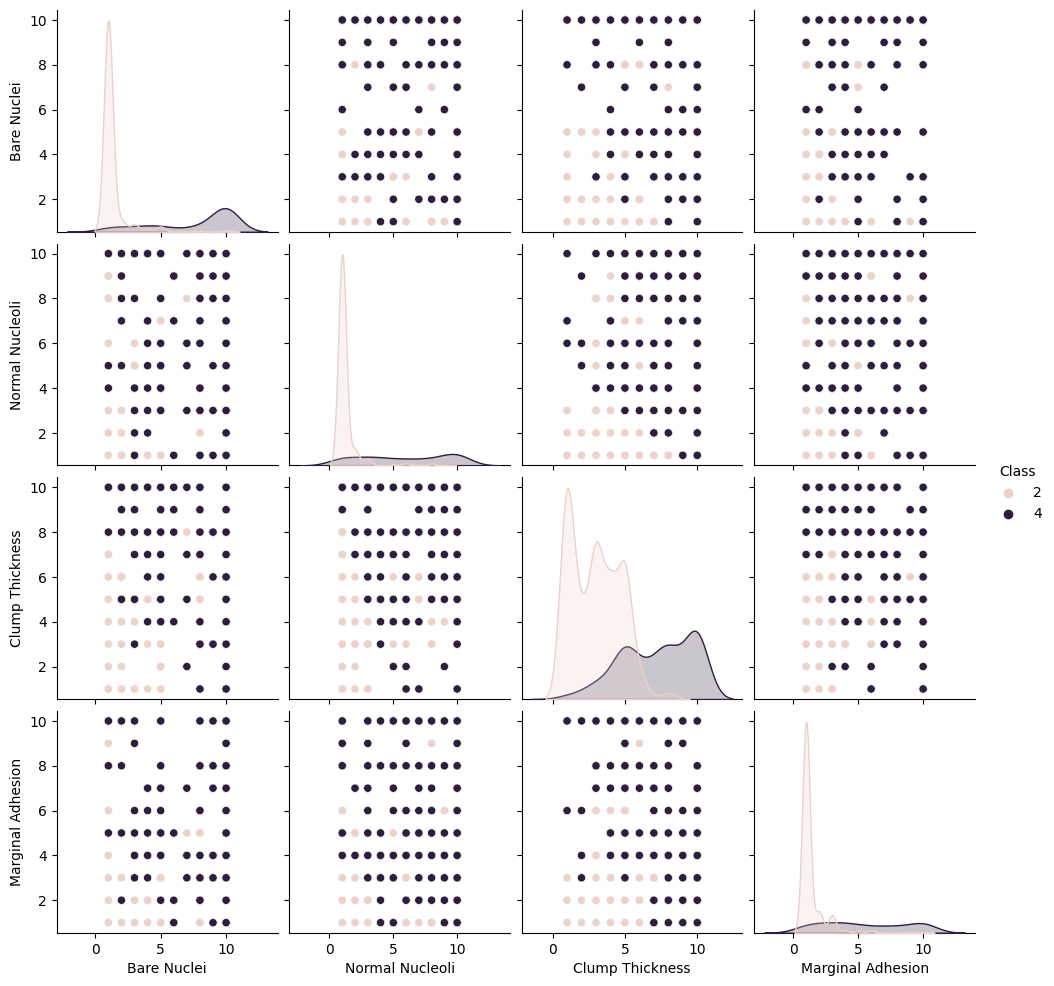

In [20]:
sns.pairplot(df, hue="Class", vars = ["Bare Nuclei", "Normal Nucleoli", "Clump Thickness", "Marginal Adhesion"])
plt.show()

Separate target and feature variables

In [21]:
# y includes our labels and x includes our features
y = df.Class 
X = df.drop(['Class','Sample code number'], axis=1)
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


Here y will contain final outcome to be Benign or Malignat i.e Class column.
X will include features other than outcome. Also, X will exclude the column sample code number as it is not useful for prediction.

In [22]:
cor_matrix = df.corr().abs()

Plot heat map for correlation matrix.

<AxesSubplot: >

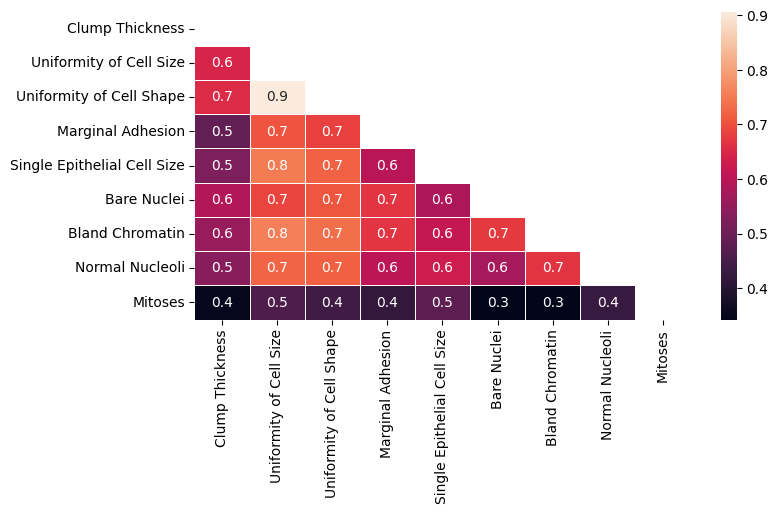

In [23]:
#correlation map
f,ax = plt.subplots(figsize=(8, 4))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

In [24]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


C:\Users\Viviana Lopes\AppData\Local\Temp\ipykernel_7224\2599239119.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


 So we are selecting the columns which are having absolute correlation greater than 0.75 and making a list of those columns named 'to_drop'

In [25]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop

['Uniformity of Cell Shape', 'Single Epithelial Cell Size', 'Bland Chromatin']

Dropping unwanted columns

In [26]:
X = X.drop(X[to_drop], axis=1)
X.columns

Index(['Clump Thickness', 'Uniformity of Cell Size', 'Marginal Adhesion',
       'Bare Nuclei', 'Normal Nucleoli', 'Mitoses'],
      dtype='object')

This way we found the best features for further processing

C:\Users\Viviana Lopes\AppData\Local\Temp\ipykernel_7224\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<AxesSubplot: xlabel='Class', ylabel='Density'>

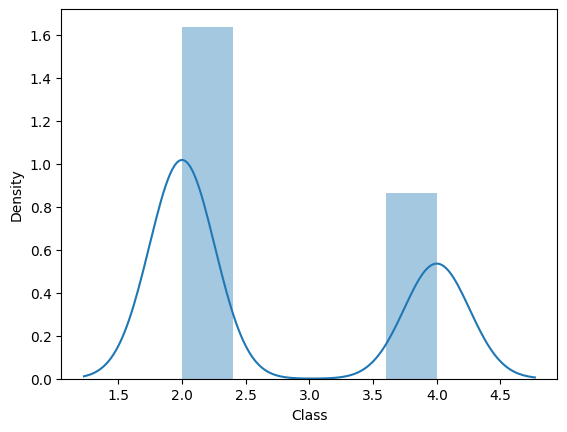

In [27]:
sns.distplot(y)

#### Train test split the data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.35)
print(X_train.shape)

(454, 6)


#### Apply K Nearest Neighbour alogorithm

In [29]:
knnmodel = KNeighborsClassifier(n_neighbors=2)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [30]:
# Evaluating on Test set
knnmodel_pred_test = knnmodel.predict(X_test)
# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, knnmodel_pred_test) * 100 , 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  92.65
